## Set up the environment

In [1]:
import sys
import os
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(project_root)

# Print the current working directory and project root for debugging
print("Current Working Directory:", current_dir)
print("Project Root Directory:", project_root)

Current Working Directory: /Users/maspunx/unet/jupyter_unet/notebooks
Project Root Directory: /Users/maspunx/unet/jupyter_unet


## Import necessary libraries

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
import random
from skimage.measure import label, regionprops
from src.unet import ImageSegmentationModel
from utils.data_utils import load_images, save_preprocessed_data, load_preprocessed_data

2024-09-14 19:23:39.343208: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Define paths

In [3]:
image_dir = os.path.join(project_root, 'data/raw/images')
mask_dir = os.path.join(project_root, 'data/raw/masks')
model_path = os.path.join(project_root, 'models/unet_model.h5')
processed_dir = os.path.join(project_root, 'data/processed')
results_dir = os.path.join(project_root, 'results/segmentation_results')

# Print the absolute paths for debugging
print("Image Directory:", image_dir)
print("Mask Directory:", mask_dir)

# Verify that the directories exist
assert os.path.exists(image_dir), f"Directory does not exist: {image_dir}"
assert os.path.exists(mask_dir), f"Directory does not exist: {mask_dir}"

Image Directory: /Users/maspunx/unet/jupyter_unet/data/raw/images
Mask Directory: /Users/maspunx/unet/jupyter_unet/data/raw/masks


## Create an instance of the ImageSegmentationModel

In [4]:
image_model = ImageSegmentationModel(image_dir, mask_dir, model_path, processed_dir, results_dir)

Loading existing model from /Users/maspunx/unet/jupyter_unet/models/unet_model.h5


2024-09-14 19:23:46.934564: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Train the model if not already trained

In [5]:
if not os.path.exists(model_path):
    history = image_model.train()
    image_model.plot_history(history)


## Test the model with random images

1/1 [==============================] - 0s 172ms/step
Predicted mask saved to /Users/maspunx/unet/jupyter_unet/results/segmentation_results/predicted_mask_water_body_8541.jpg
1/1 [==============================] - 0s 33ms/step
Predicted mask saved to /Users/maspunx/unet/jupyter_unet/results/segmentation_results/predicted_mask_water_body_2491.jpg
1/1 [==============================] - 0s 32ms/step
Predicted mask saved to /Users/maspunx/unet/jupyter_unet/results/segmentation_results/predicted_mask_water_body_1075.jpg
1/1 [==============================] - 0s 31ms/step
Predicted mask saved to /Users/maspunx/unet/jupyter_unet/results/segmentation_results/predicted_mask_water_body_1241.jpg
1/1 [==============================] - 0s 31ms/step
Predicted mask saved to /Users/maspunx/unet/jupyter_unet/results/segmentation_results/predicted_mask_water_body_8394.jpg


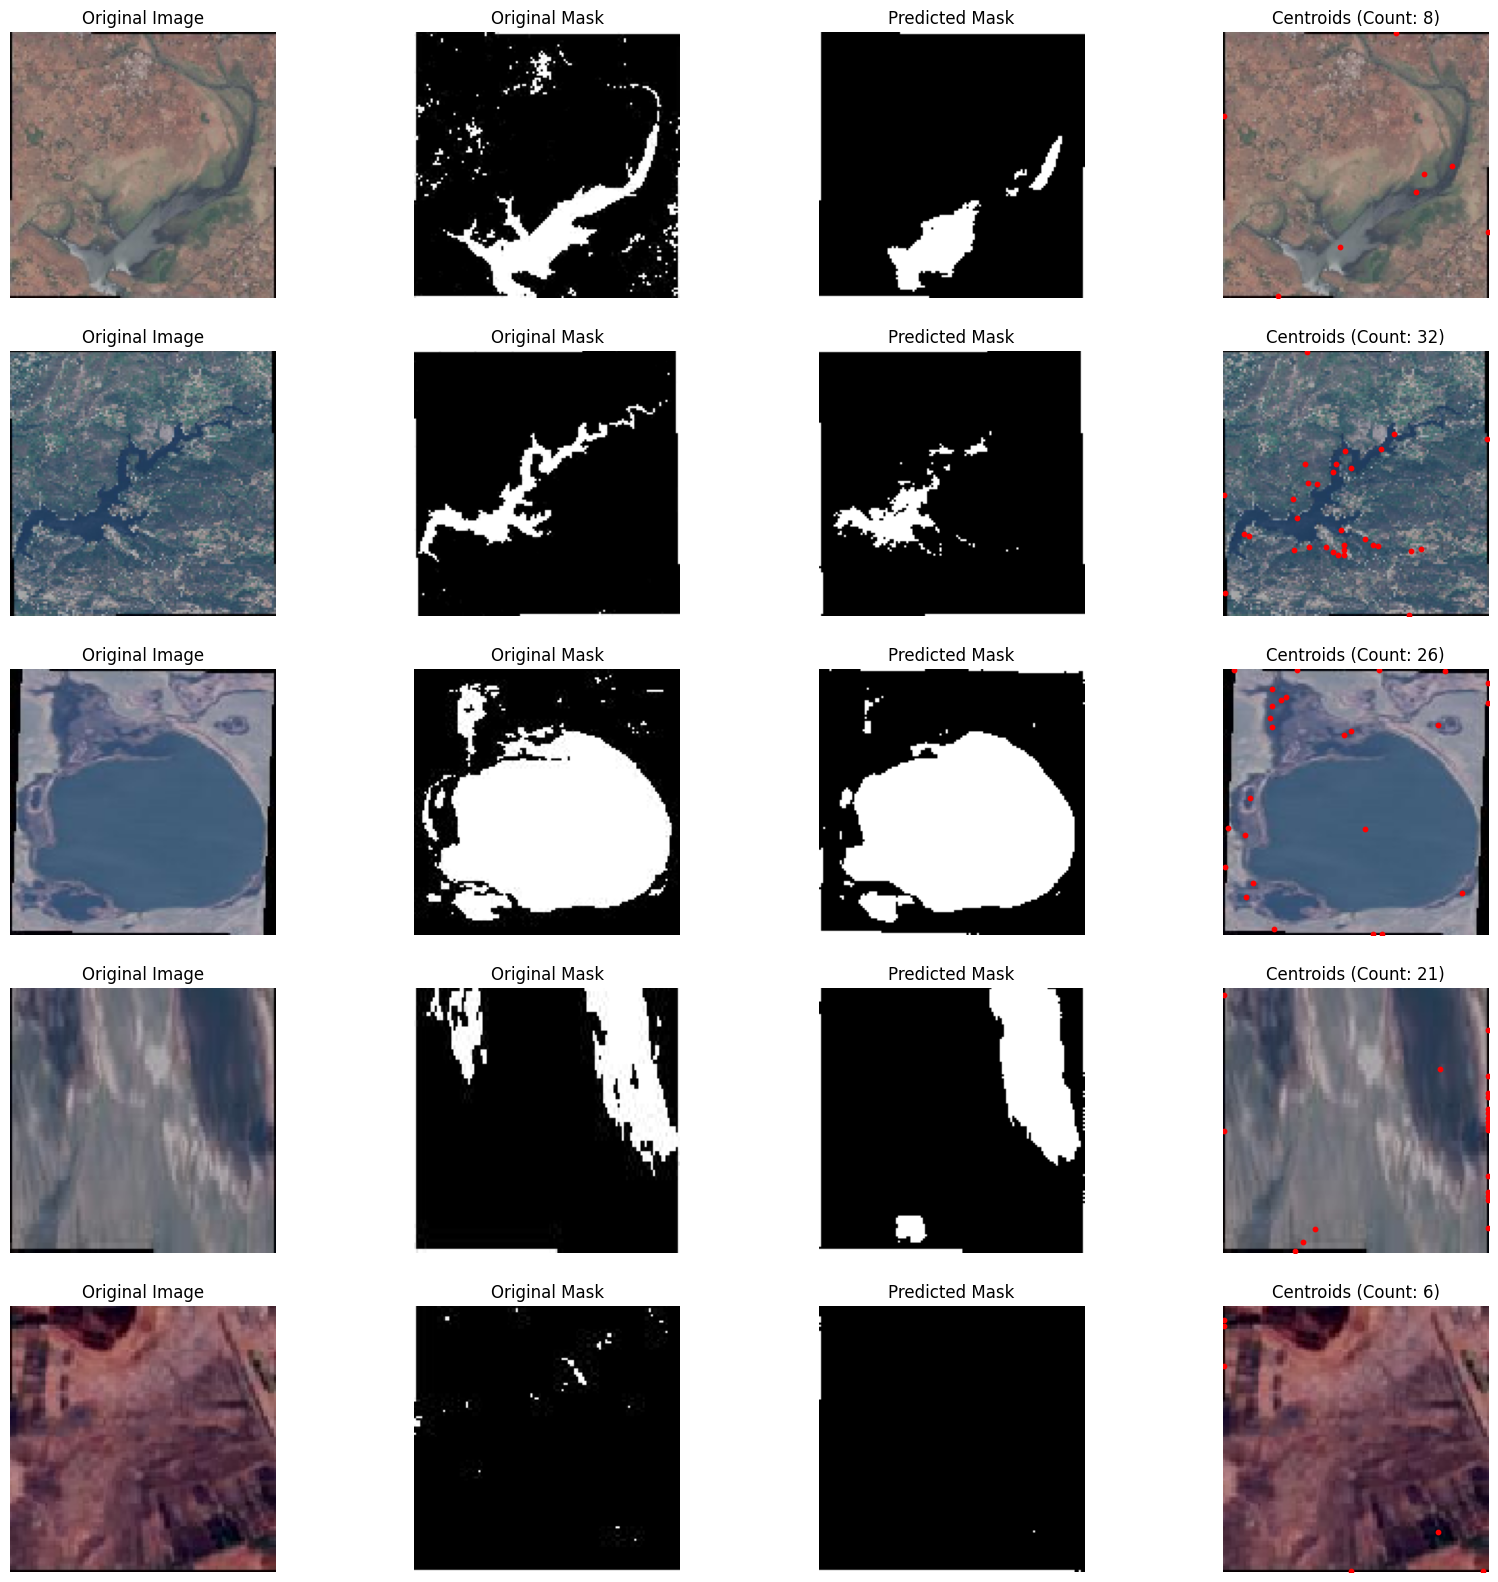

In [6]:
image_model.test_random_images(5)

## Visualize and count centers in a specific image

1/1 [==============================] - 0s 35ms/step


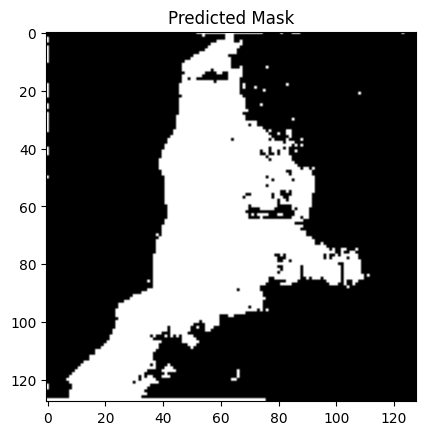

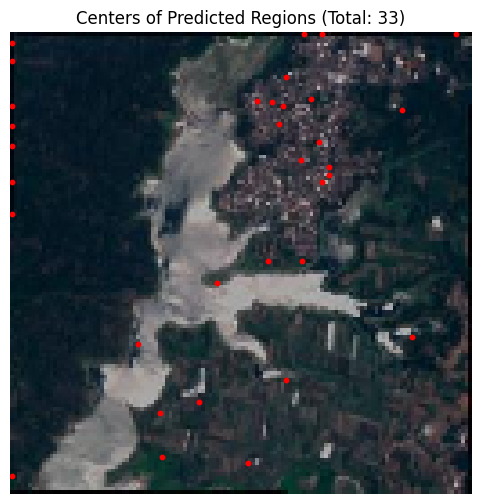

Predicted mask with centroids saved to /Users/maspunx/unet/jupyter_unet/results/segmentation_results/predicted_mask_with_centroids_water_body_10.jpg
Number of centers detected: 33


In [7]:
image_path = os.path.join(image_dir,'water_body_10.jpg')
centroids, count = image_model.visualize_and_count_centers(image_path)
print(f"Number of centers detected: {count}")